# Proyek Analisis Data: Annual Cause Death Analysis

*   **Nama:** Riza Nursyah
*   **Email:** rizanursyah02@gmail.com
*   **Instansi:** Universitas Muhammadiyah Sukabumi
*   **Prodi:** Teknik Informatika

# Beberapa Hal yang Akan di Analisis:


*   Analisis tren waktu: Melihat perubahan dalam jumlah kematian dari tahun ke tahun untuk setiap penyebab kematian
*   Analisis penyebab kematian utama: Mengidentifikasi penyebab kematian utama secara global
*   Korelasi antar penyebab kematian: Menganalisis korelasi antara penyebab kematian untuk melihat apakah ada hubungan antara mereka
*   Tren Kematian akibat HIV/AIDS di Indonesia
*   Tren Kematian Penyakit Menular dan Tidak Menular di Indonesia

# Import Package/Library yang Akan Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Data Wrangling

## Gathering Data

In [ ]:
death_df = pd.read_csv('https://raw.githubusercontent.com/rizanss/Annual-Cause-Death-Analysis/main/data/annual_cause_death.csv')
death_df.head()

,Entity,Code,Year,Meningitis fatalities,Dementia fatalities,Parkinsons fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,10037
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,10021
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,9807
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,10228
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,12144


## Assessing Data

In [ ]:
# Menilai data death_df
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Entity                                  6840 non-null   object
 1   Code                                    6840 non-null   object
 2   Year                                    6840 non-null   int64 
 3   Meningitis fatalities                   6840 non-null   int64 
 4   Dementia fatalities                     6840 non-null   int64 
 5   Parkinsons fatalities                   6840 non-null   int64 
 6   Nutritional deficiency fatalities       6840 non-null   int64 
 7   Malaria fatalities                      6840 non-null   int64 
 8   Drowning fatalities                     6840 non-null   int64 
 9   Interpersonal violence fatalities       6840 non-null   int64 
 10  Maternal disorder fatalities            6840 non-null   int64 
 11  HIV/

In [ ]:
# Cek missing values pada death_df
death_df.isna().sum()

Entity                                    0
Code                                      0
Year                                      0
Meningitis fatalities                     0
Dementia fatalities                       0
Parkinsons fatalities                     0
Nutritional deficiency fatalities         0
Malaria fatalities                        0
Drowning fatalities                       0
Interpersonal violence fatalities         0
Maternal disorder fatalities              0
HIV/AIDS fatalities                       0
Drug disorder fatalities                  0
Tuberculosis fatalities                   0
Cardiovascular fatalities                 0
Lower respiratory fatalities              0
Neonatal disorder fatalities              0
Alcohol disorder fatalities               0
Self harm fatalities                      0
Forces of nature fatalities               0
Diarrheal disease fatalities              0
Environmental exposure fatalities         0
Neoplasm fatalities             

In [ ]:
# Memeriksa duplikasi pada data death_df
print('Jumlah duplikasi: ', death_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
# Menilai parameter statistik pada data death_df
death_df.describe()

,Year,Meningitis fatalities,Dementia fatalities,Parkinsons fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,Maternal disorder fatalities,HIV/AIDS fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
count,6840.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,6840.000000
mean,2004.500000,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520,9789.471053
std,8.656074,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516,49699.111854
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000,0.000000
50%,2004.500000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000,2.000000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000,773.750000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000,801683.000000


## Cleaning Data

In [ ]:
# Mengkonversi kolom 'Year' menjadi tipe data datetime
death_df['Year'] = pd.to_datetime(death_df['Year'], format = '%Y')

# Data Analysis and Data Visualization

## Analisis tren waktu: Melihat perubahan dalam jumlah kematian dari tahun ke tahun untuk setiap penyebab kematian

In [ ]:
# Membuat subset data untuk masing-masing penyebab kematian
penyebab_kematian = death_df.columns[3:]
death_subset = death_df.melt(id_vars=['Entity', 'Code', 'Year'], value_vars=penyebab_kematian, var_name='Penyebab', value_name='Kematian')
death_subset

,Entity,Code,Year,Penyebab,Kematian
0,Afghanistan,AFG,1990-01-01,Meningitis fatalities,2159
1,Afghanistan,AFG,1991-01-01,Meningitis fatalities,2218
2,Afghanistan,AFG,1992-01-01,Meningitis fatalities,2475
3,Afghanistan,AFG,1993-01-01,Meningitis fatalities,2812
4,Afghanistan,AFG,1994-01-01,Meningitis fatalities,3027
...,...,...,...,...,...
218875,Zimbabwe,ZWE,2015-01-01,Measles fatalities,720
218876,Zimbabwe,ZWE,2016-01-01,Measles fatalities,432
218877,Zimbabwe,ZWE,2017-01-01,Measles fatalities,307
218878,Zimbabwe,ZWE,2018-01-01,Measles fatalities,402


<ipython-input-22-1a770ccaf443>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=death_subset, x='Year', y='Kematian', hue='Penyebab', ci=None)
<ipython-input-22-1a770ccaf443>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


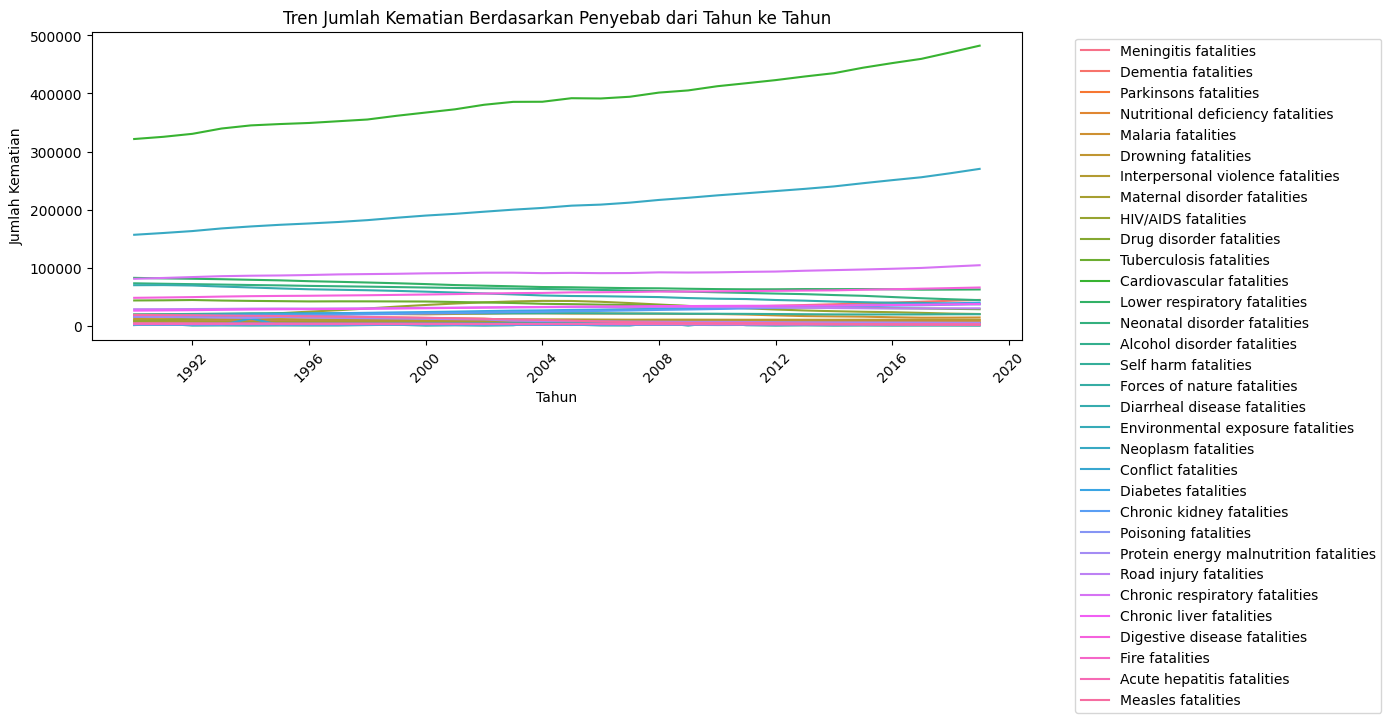

In [22]:
# Visualisasi
plt.figure(figsize=(12, 4))
sns.lineplot(data=death_subset, x='Year', y='Kematian', hue='Penyebab', ci=None)
plt.title('Tren Jumlah Kematian Berdasarkan Penyebab dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analisis penyebab kematian utama: Mengidentifikasi penyebab kematian utama secara global

In [ ]:
# Menghitung total kematian untuk setiap penyebab kematian
total_kematian_penyebab = death_df.drop(columns=['Entity', 'Code', 'Year']).sum().reset_index()
total_kematian_penyebab.columns = ['Penyebab', 'Total Kematian']
total_kematian_penyebab = total_kematian_penyebab.sort_values(by='Total Kematian', ascending=False)

# Mengambil 10 penyebab kematian utama
top_10_penyebab = total_kematian_penyebab.head(10)
top_10_penyebab

,Penyebab,Total Kematian
11,Cardiovascular fatalities,2674494456
19,Neoplasm fatalities,1414869873
26,Chronic respiratory fatalities,624518660
12,Lower respiratory fatalities,474311819
13,Neonatal disorder fatalities,419395741
28,Digestive disease fatalities,386634503
17,Diarrheal disease fatalities,363974043
10,Tuberculosis fatalities,254128070
27,Chronic liver fatalities,218188606
25,Road injury fatalities,209543100


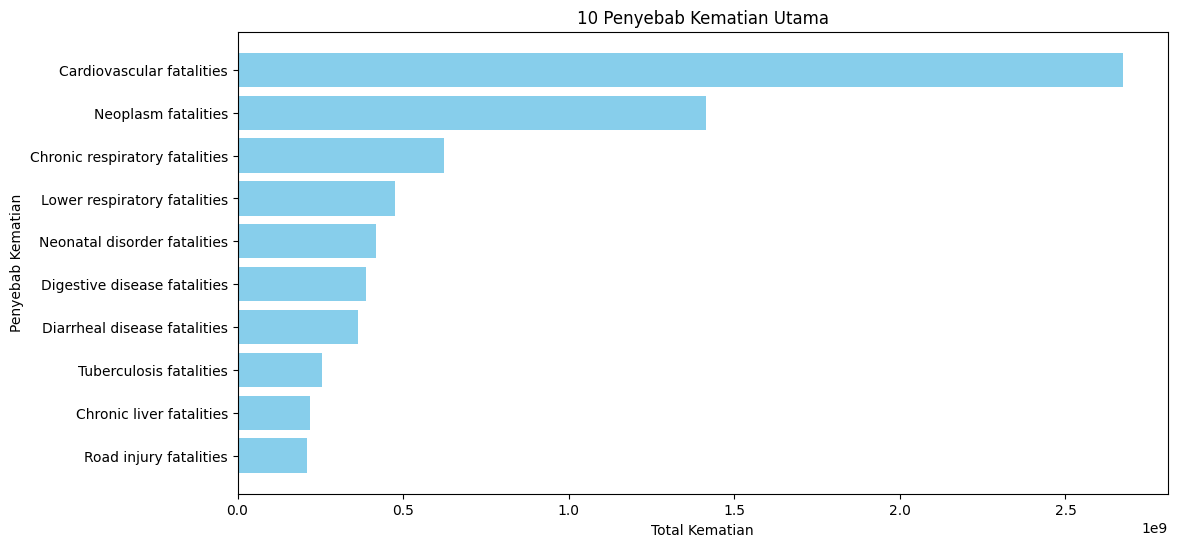

In [23]:
# Visualisasi
plt.figure(figsize=(12, 6))
plt.barh(top_10_penyebab['Penyebab'], top_10_penyebab['Total Kematian'], color='skyblue')
plt.xlabel('Total Kematian')
plt.ylabel('Penyebab Kematian')
plt.title('10 Penyebab Kematian Utama')
plt.gca().invert_yaxis()  # Membalikkan urutan agar penyebab kematian utama muncul di bagian atas
plt.show()

## Korelasi antar penyebab kematian: Menganalisis korelasi antara penyebab kematian

In [24]:
# Menghitung korelasi antara penyebab kematian
corr_matrix = death_df.drop(columns=['Entity', 'Code', 'Year']).corr()

corr_matrix

,Meningitis fatalities,Dementia fatalities,Parkinsons fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,Maternal disorder fatalities,HIV/AIDS fatalities,Drug disorder fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
Meningitis fatalities,1.000000,0.531723,0.590434,0.937179,0.921280,0.793587,0.754517,0.968088,0.850084,0.523271,...,0.704765,0.787873,0.941427,0.779909,0.708359,0.798340,0.789037,0.861946,0.869346,0.911732
Dementia fatalities,0.531723,1.000000,0.992060,0.516379,0.374969,0.733680,0.805310,0.551098,0.482923,0.911316,...,0.944607,0.824363,0.506070,0.861838,0.862667,0.885521,0.900046,0.811964,0.556361,0.356044
Parkinsons fatalities,0.590434,0.992060,1.000000,0.572738,0.413307,0.796598,0.843961,0.618997,0.517327,0.914278,...,0.970739,0.869158,0.559332,0.909553,0.913295,0.929708,0.940835,0.864825,0.633653,0.410587
Nutritional deficiency fatalities,0.937179,0.516379,0.572738,1.000000,0.790792,0.833597,0.741616,0.947419,0.698680,0.530714,...,0.671101,0.758848,0.996748,0.762161,0.711619,0.767602,0.769300,0.840197,0.895065,0.936715
Malaria fatalities,0.921280,0.374969,0.413307,0.790792,1.000000,0.543111,0.581785,0.820479,0.923097,0.345441,...,0.521445,0.626254,0.816679,0.577652,0.470409,0.597696,0.584602,0.667005,0.629820,0.806929
Drowning fatalities,0.793587,0.733680,0.796598,0.833597,0.543111,1.000000,0.866080,0.841816,0.554229,0.755555,...,0.845742,0.923542,0.814973,0.945260,0.950188,0.916139,0.919872,0.938193,0.888172,0.710934
Interpersonal violence fatalities,0.754517,0.805310,0.843961,0.741616,0.581785,0.866080,1.000000,0.764773,0.658105,0.806037,...,0.893829,0.898175,0.736797,0.926357,0.868123,0.911462,0.915854,0.927321,0.736537,0.604860
Maternal disorder fatalities,0.968088,0.551098,0.618997,0.947419,0.820479,0.841816,0.764773,1.000000,0.755190,0.543613,...,0.742747,0.775732,0.934561,0.805551,0.760821,0.836716,0.828804,0.887085,0.953595,0.880331
HIV/AIDS fatalities,0.850084,0.482923,0.517327,0.698680,0.923097,0.554229,0.658105,0.755190,1.000000,0.440413,...,0.603952,0.682573,0.726707,0.646132,0.540464,0.650344,0.638003,0.695151,0.577833,0.680466
Drug disorder fatalities,0.523271,0.911316,0.914278,0.530714,0.345441,0.755555,0.806037,0.543613,0.440413,1.000000,...,0.875442,0.784488,0.522694,0.825492,0.839821,0.835458,0.853951,0.793326,0.565505,0.382912


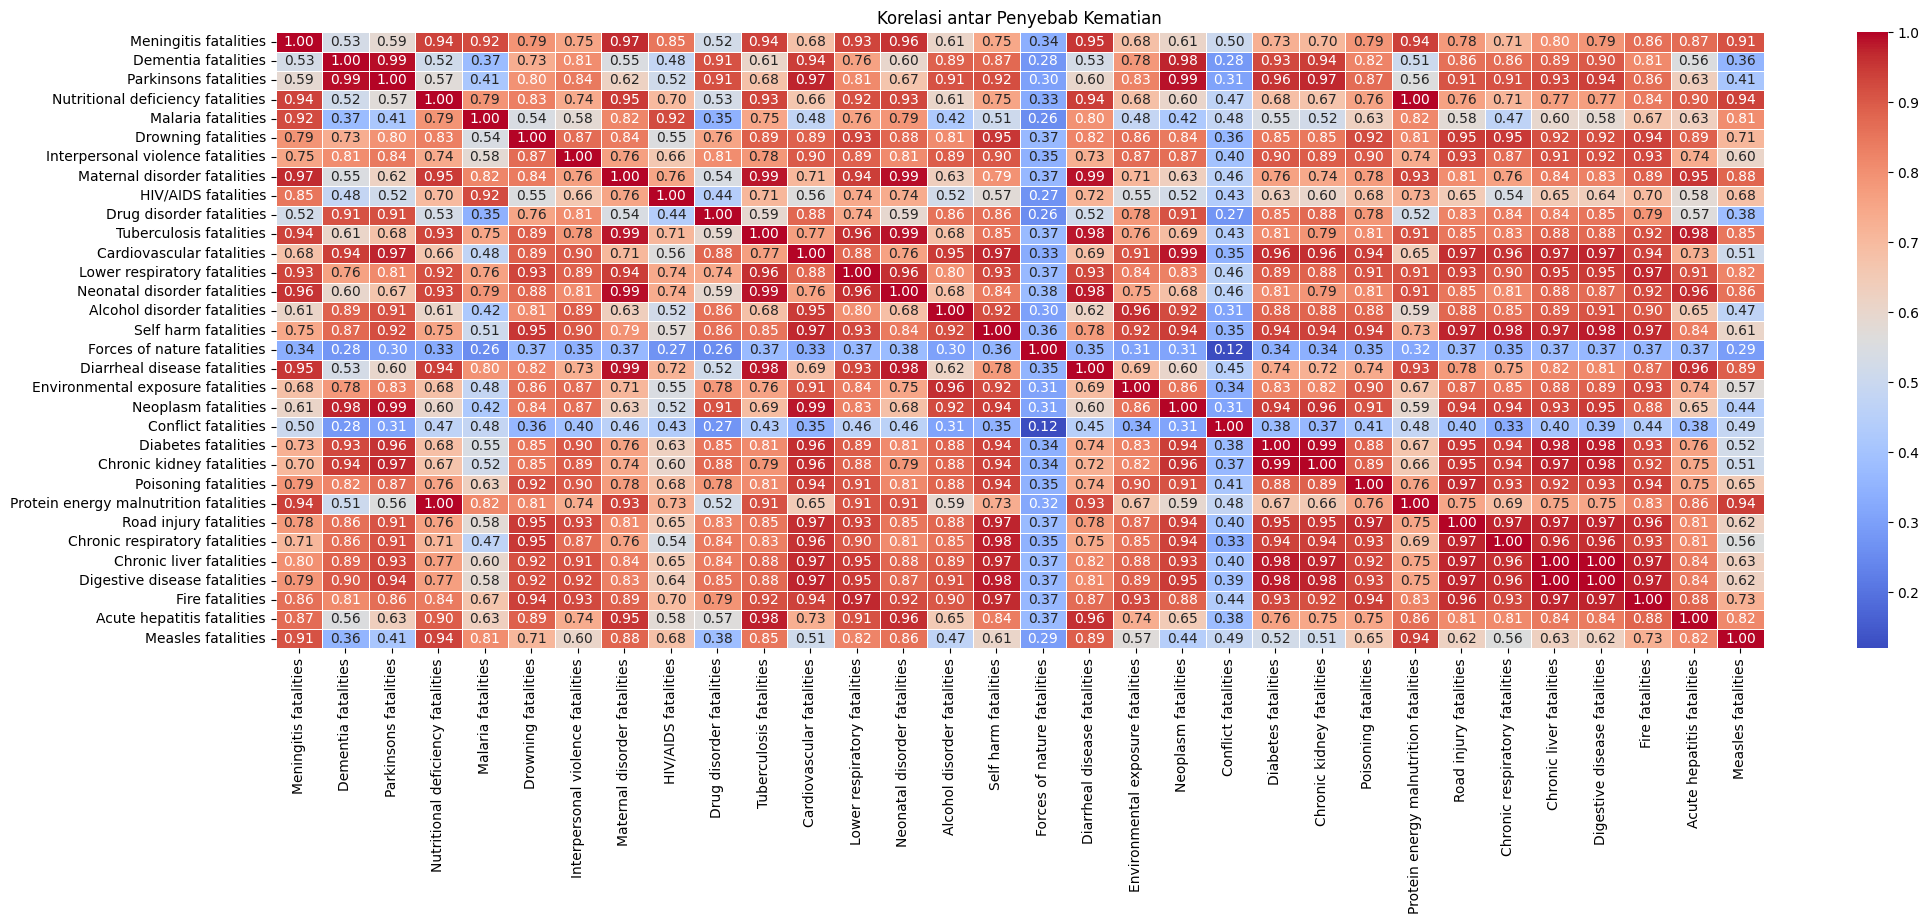

In [25]:
# Visualisasi
plt.figure(figsize=(24, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antar Penyebab Kematian')
plt.show()

## Tren Kematian akibat HIV/AIDS di Indonesia

In [29]:
# Memilih data untuk negara Indonesia dan penyebab kematian HIV/AIDS
data_indonesia_hiv = death_df[(death_df['Entity'] == 'Indonesia') & (death_df['HIV/AIDS fatalities'].notna())]

# Memilih kolom 'Year' dan 'HIV/AIDS fatalities'
tahun = data_indonesia_hiv['Year']
kematian_hiv = data_indonesia_hiv['HIV/AIDS fatalities']

kematian_hiv

2700      12
2701      74
2702     150
2703     231
2704     333
2705     448
2706     574
2707     709
2708     851
2709     999
2710    1155
2711    1322
2712    1514
2713    1748
2714    2029
2715    2355
2716    2686
2717    2791
2718    2882
2719    3095
2720    3499
2721    4032
2722    4512
2723    4852
2724    5164
2725    5316
2726    5340
2727    5290
2728    5415
2729    5603
Name: HIV/AIDS fatalities, dtype: int64

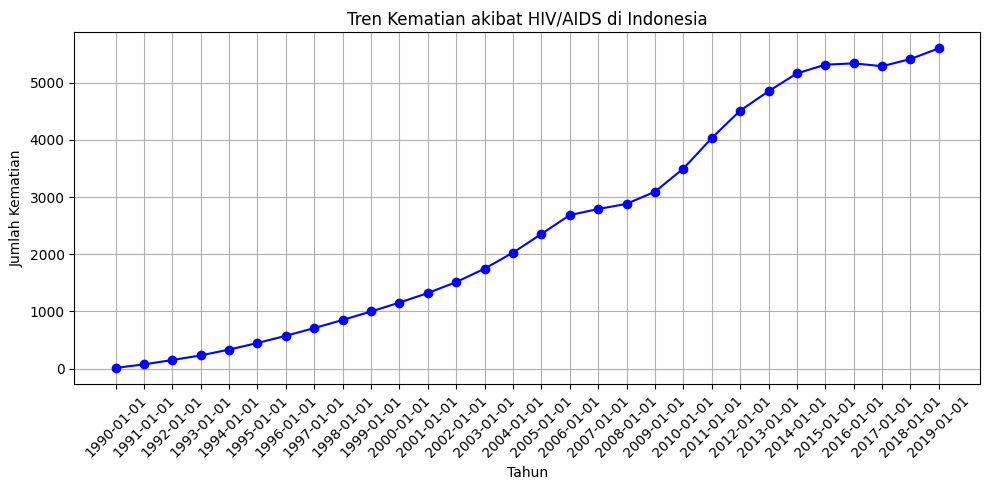

In [31]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(tahun, kematian_hiv, marker='o', color='b')
plt.title('Tren Kematian akibat HIV/AIDS di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.grid(True)
plt.xticks(tahun, rotation=45)
plt.tight_layout()
plt.show()

## Tren Kematian Penyakit Menular dan Tidak Menular di Indonesia

In [33]:
# Memilih data untuk negara Indonesia
data_indonesia = death_df[death_df['Entity'] == 'Indonesia']

# Memilih kolom 'Year' untuk sumbu x
tahun = data_indonesia['Year']

# Memilih kolom kematian untuk penyakit menular
penyakit_menular = ['Tuberculosis fatalities', 'Malaria fatalities', 'HIV/AIDS fatalities']

# Memilih kolom kematian untuk penyakit tidak menular
penyakit_tidak_menular = ['Cardiovascular fatalities', 'Diabetes fatalities', 'Neoplasm fatalities']

print(penyakit_menular, penyakit_tidak_menular)

['Tuberculosis fatalities', 'Malaria fatalities', 'HIV/AIDS fatalities'] ['Cardiovascular fatalities', 'Diabetes fatalities', 'Neoplasm fatalities']


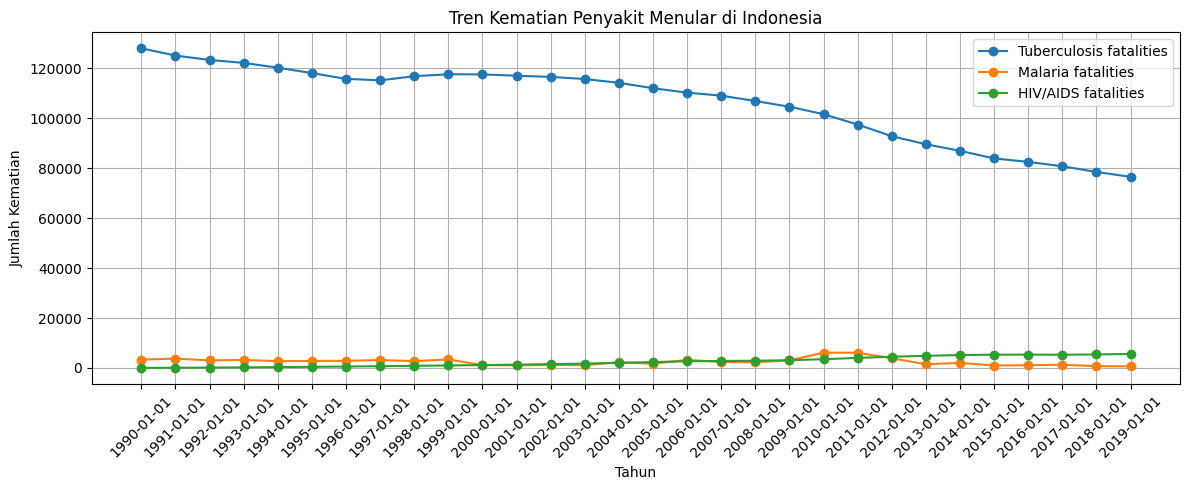

In [34]:
# Plotting untuk penyakit menular
plt.figure(figsize=(12, 5))
for penyakit in penyakit_menular:
    kematian = data_indonesia[penyakit]
    plt.plot(tahun, kematian, marker='o', label=penyakit)

plt.title('Tren Kematian Penyakit Menular di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.grid(True)
plt.xticks(tahun, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

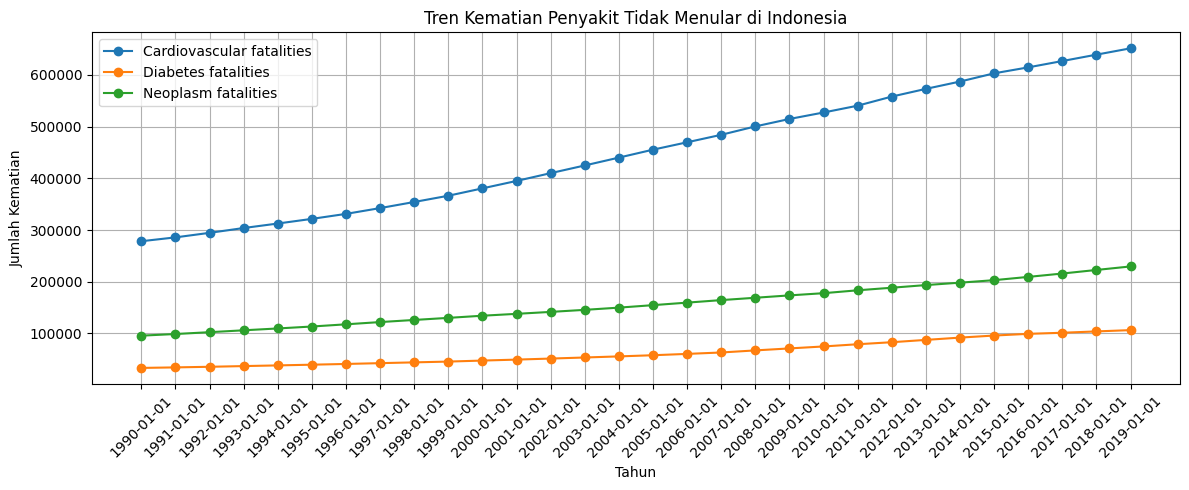

In [35]:
# Plotting untuk penyakit tidak menular
plt.figure(figsize=(12, 5))
for penyakit in penyakit_tidak_menular:
    kematian = data_indonesia[penyakit]
    plt.plot(tahun, kematian, marker='o', label=penyakit)

plt.title('Tren Kematian Penyakit Tidak Menular di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.grid(True)
plt.xticks(tahun, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()